In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
pkmndata = pd.read_csv('train.csv')
pkmndata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [5]:
print(pkmndata.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [6]:
legnd = pd.DataFrame(pkmndata["CentralAir"])  # Response
total = pd.DataFrame(pkmndata['SalePrice'])      # Predictor

In [7]:
# Train Set : 600 samples
total_train = pd.DataFrame(total[:600])
legnd_train = pd.DataFrame(legnd[:600])

# Test Set : 200 samples
total_test = pd.DataFrame(total[-200:])
legnd_test = pd.DataFrame(legnd[-200:])

# Check the sample sizes
print("Train Set :", legnd_train.shape, total_train.shape)
print("Test Set  :", legnd_test.shape, total_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [8]:
# Import Decision Tree Classifier model from Scikit-Learn 
#FIRST TREE Q1
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [9]:
dectree.fit(total_train, legnd_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'SalesPrice <= 107450.0\ngini = 0.127\nsamples = 600\nvalue = [41, 559]\nclass = AirconIsNo'),
 Text(167.4, 326.16, 'SalesPrice <= 79250.0\ngini = 0.479\nsamples = 63\nvalue = [25, 38]\nclass = AirconIsNo'),
 Text(83.7, 108.72000000000003, 'gini = 0.408\nsamples = 14\nvalue = [10, 4]\nclass = AirconYes'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.425\nsamples = 49\nvalue = [15, 34]\nclass = AirconIsNo'),
 Text(502.20000000000005, 326.16, 'SalesPrice <= 137500.0\ngini = 0.058\nsamples = 537\nvalue = [16, 521]\nclass = AirconIsNo'),
 Text(418.5, 108.72000000000003, 'gini = 0.154\nsamples = 131\nvalue = [11, 120]\nclass = AirconIsNo'),
 Text(585.9, 108.72000000000003, 'gini = 0.024\nsamples = 406\nvalue = [5, 401]\nclass = AirconIsNo')]

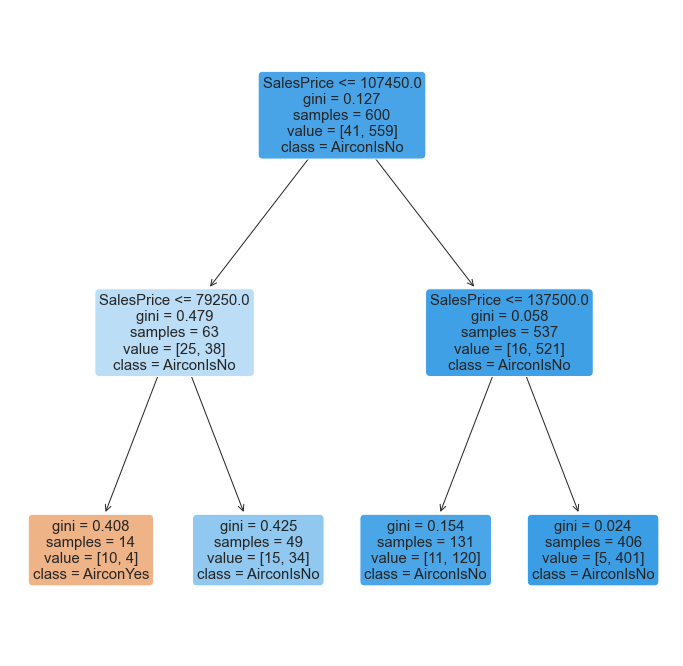

In [10]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalesPrice"], 
          class_names=["AirconYes","AirconIsNo"])

In [11]:
dectree = DecisionTreeClassifier(max_depth = 4)

In [12]:
dectree.fit(total_train, legnd_train)

DecisionTreeClassifier(max_depth=4)

[Text(1363.2954545454545, 1174.1760000000002, 'SalesPrice <= 107450.0\ngini = 0.127\nsamples = 600\nvalue = [41, 559]\nclass = AirconIsNo'),
 Text(634.090909090909, 913.248, 'SalesPrice <= 79250.0\ngini = 0.479\nsamples = 63\nvalue = [25, 38]\nclass = AirconIsNo'),
 Text(253.63636363636363, 652.3200000000002, 'SalesPrice <= 50000.0\ngini = 0.408\nsamples = 14\nvalue = [10, 4]\nclass = AirconYes'),
 Text(126.81818181818181, 391.39200000000005, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = AirconYes'),
 Text(380.45454545454544, 391.39200000000005, 'SalesPrice <= 67750.0\ngini = 0.463\nsamples = 11\nvalue = [7, 4]\nclass = AirconYes'),
 Text(253.63636363636363, 130.46400000000017, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = AirconIsNo'),
 Text(507.27272727272725, 130.46400000000017, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = AirconYes'),
 Text(1014.5454545454545, 652.3200000000002, 'SalesPrice <= 106750.0\ngini = 0.425\nsamples = 49\nvalue = [15, 34]\nclass = AirconIs

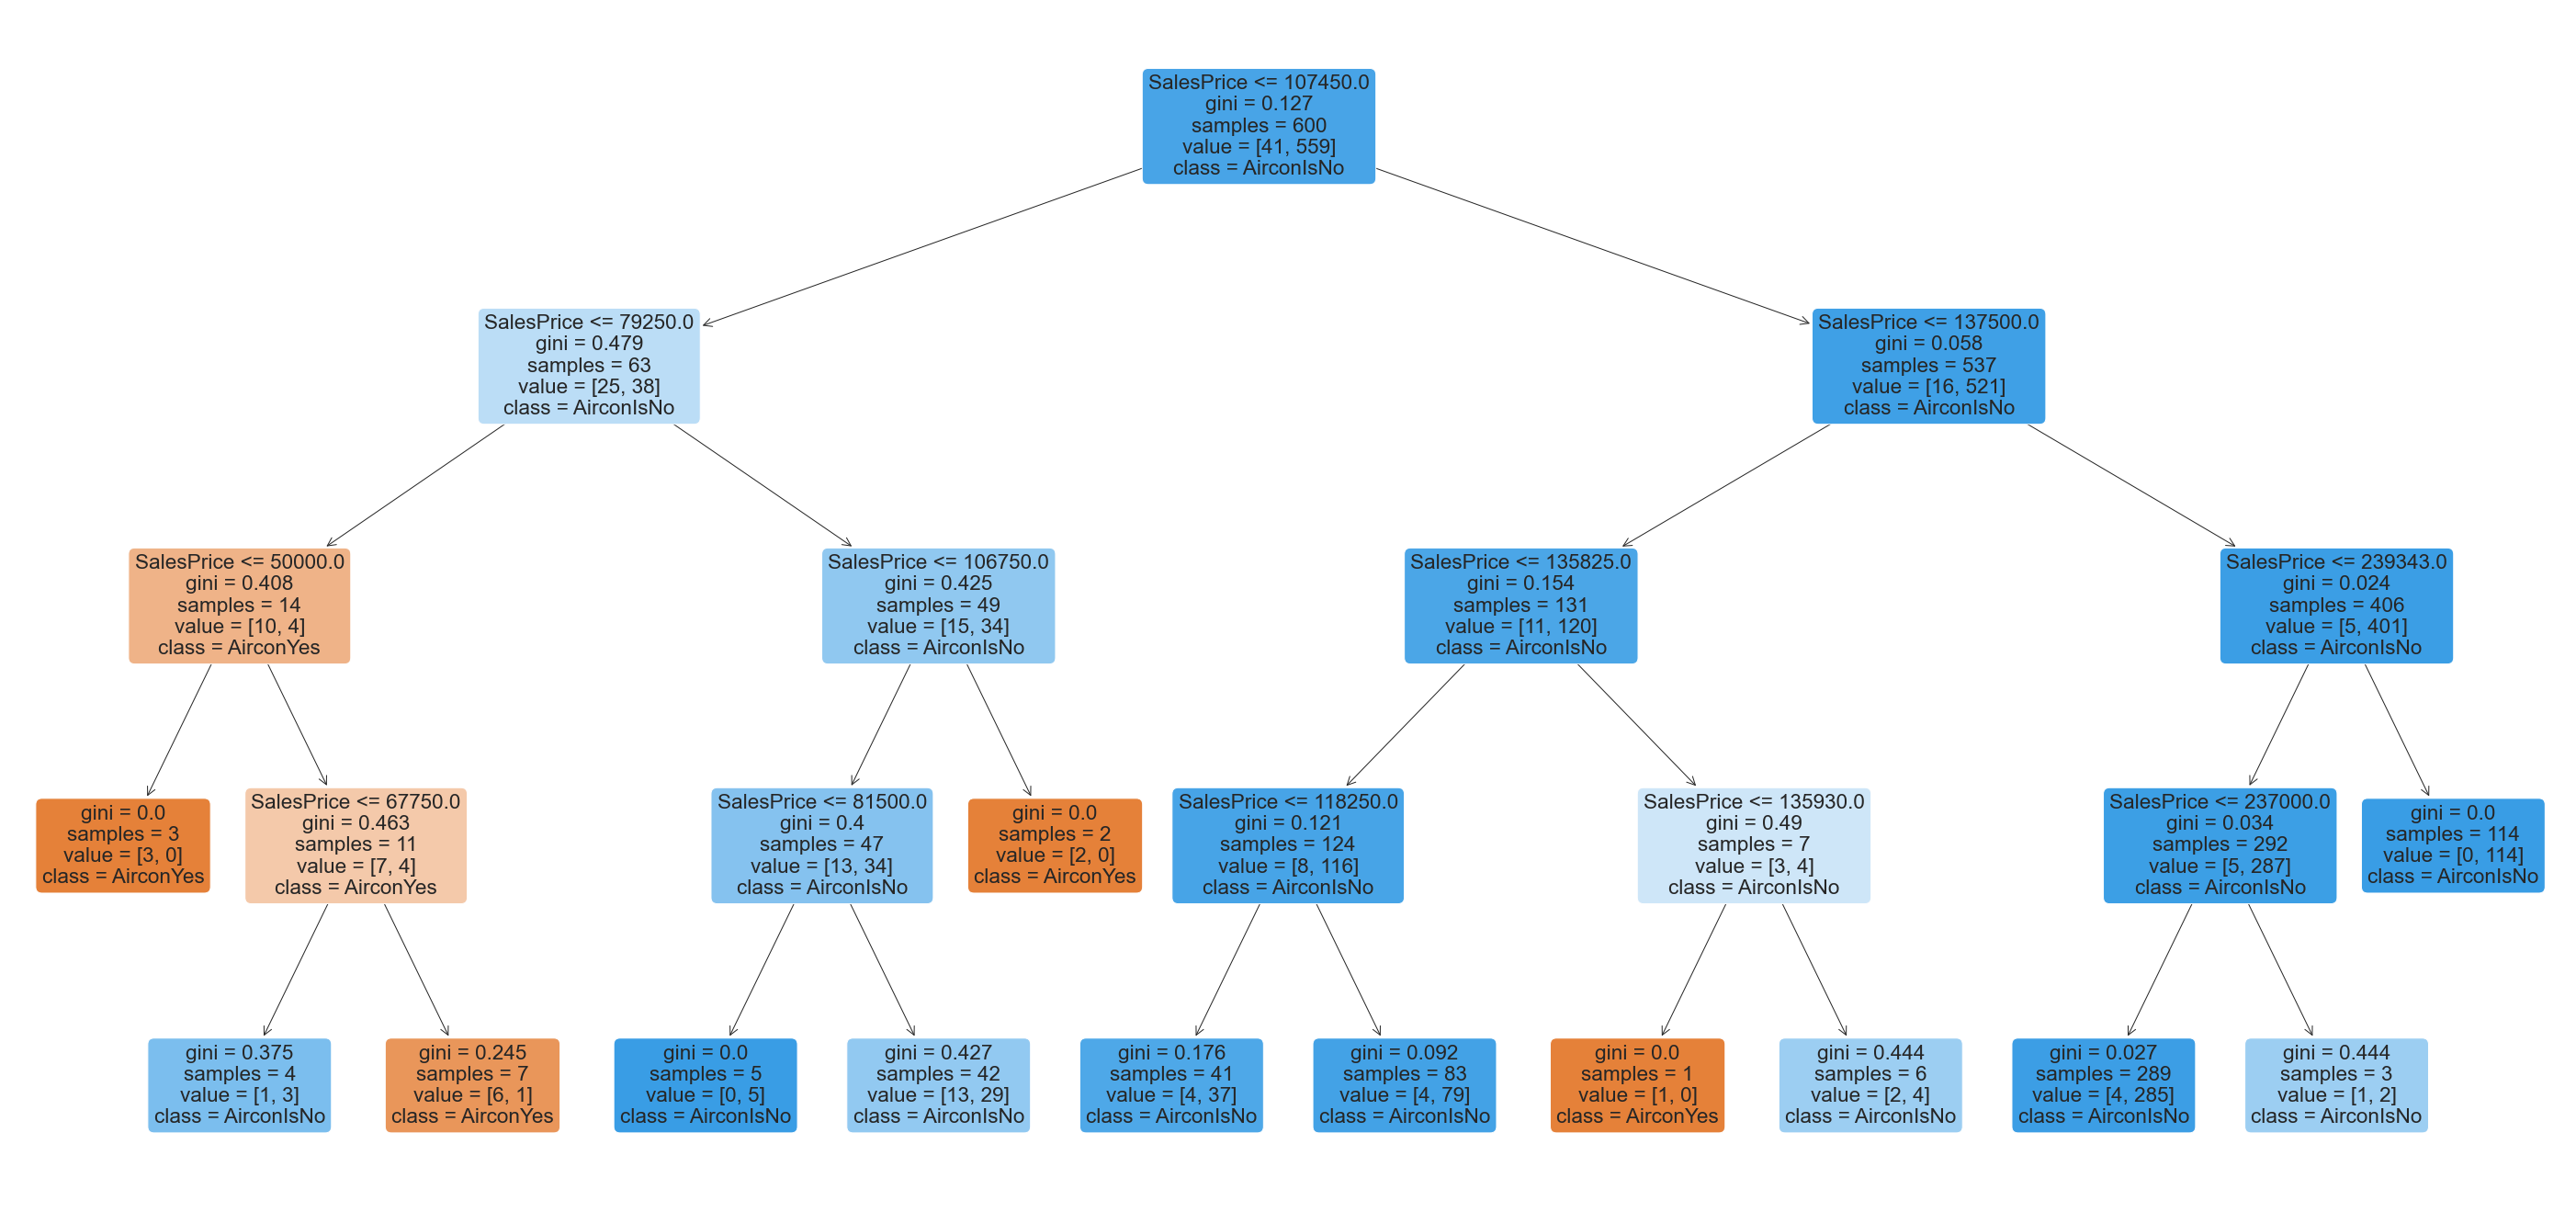

In [13]:
#Q1 Second Tree
f = plt.figure(figsize=(50,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalesPrice"], 
          class_names=["AirconYes","AirconIsNo"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9360730593607306

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9616438356164384



<AxesSubplot:>

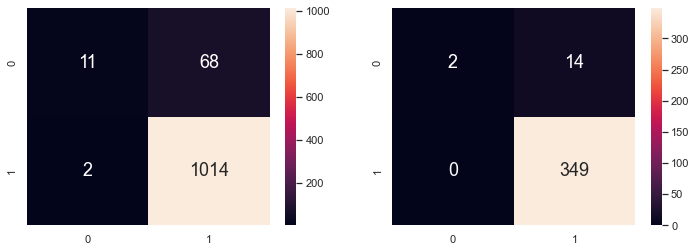

In [14]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
legnd = pd.DataFrame(pkmndata['CentralAir'])   # Response
total = pd.DataFrame(pkmndata['SalePrice'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(total, legnd, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Classification Accuracy 	: 0.9366666666666666


<AxesSubplot:>

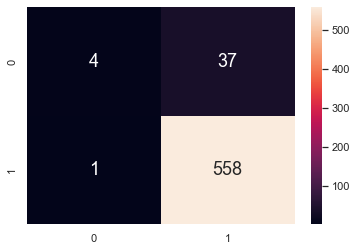

In [15]:
# Predict Legendary corresponding to Total Train
legnd_train_pred = dectree.predict(total_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(total_train, legnd_train))

# Plot the two-way Confusion Matrix

sb.heatmap(confusion_matrix(legnd_train, legnd_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [25]:
FP = confusion_matrix(legnd_train, legnd_train_pred).sum(axis=0) - np.diag(confusion_matrix(legnd_train, legnd_train_pred))  
FN = confusion_matrix(legnd_train, legnd_train_pred).sum(axis=1) - np.diag(confusion_matrix(legnd_train, legnd_train_pred))
TP = np.diag(confusion_matrix(legnd_train, legnd_train_pred))
TN = confusion_matrix(legnd_train, legnd_train_pred).sum() - (FP + FN + TP)
TPR = TP/(TP+FN)
print(TPR)

legnd_train_pred = dectree.predict(total_train)



FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


[1. 0.]


C:\Users\kohji\AppData\Local\Temp/ipykernel_17312/452168530.py:22: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
C:\Users\kohji\AppData\Local\Temp/ipykernel_17312/452168530.py:24: RuntimeWarning: invalid value encountered in true_divide
  NPV = TN/(TN+FN)
C:\Users\kohji\AppData\Local\Temp/ipykernel_17312/452168530.py:30: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


Classification Accuracy 	: 0.06833333333333333


<AxesSubplot:>

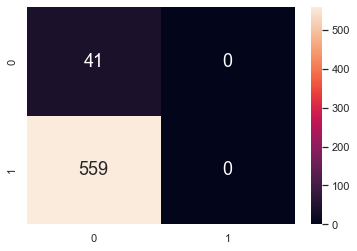

In [26]:
#yummy
legnd_train_pred = dectree.predict(total_train) 
#total is salesprice
#legend is CentralAir

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(total_train, legnd_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(legnd_train, legnd_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
#Confusion matrix of CentralAir Train and CentralAir Predicted

In [27]:
#q2
legnd = pd.DataFrame(pkmndata["CentralAir"])  # Response
total = pd.DataFrame(pkmndata['OverallQual'])      # Predictor

In [28]:
total_train = pd.DataFrame(total[:600])
legnd_train = pd.DataFrame(legnd[:600])

# Test Set : 200 samples
total_test = pd.DataFrame(total[-200:])
legnd_test = pd.DataFrame(legnd[-200:])


In [29]:
dectree1 = DecisionTreeClassifier(max_depth = 2)

In [30]:
dectree1.fit(total_train, legnd_train)

DecisionTreeClassifier(max_depth=2)

[Text(669.6, 1087.2, 'OverallQual <= 3.5\ngini = 0.127\nsamples = 600\nvalue = [41, 559]\nclass = AirconIsNo'),
 Text(334.8, 652.32, 'OverallQual <= 2.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = AirconYes'),
 Text(167.4, 217.44000000000005, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = AirconYes'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = AirconYes'),
 Text(1004.4000000000001, 652.32, 'OverallQual <= 5.5\ngini = 0.114\nsamples = 592\nvalue = [36, 556]\nclass = AirconIsNo'),
 Text(837.0, 217.44000000000005, 'gini = 0.222\nsamples = 204\nvalue = [26, 178]\nclass = AirconIsNo'),
 Text(1171.8, 217.44000000000005, 'gini = 0.05\nsamples = 388\nvalue = [10, 378]\nclass = AirconIsNo')]

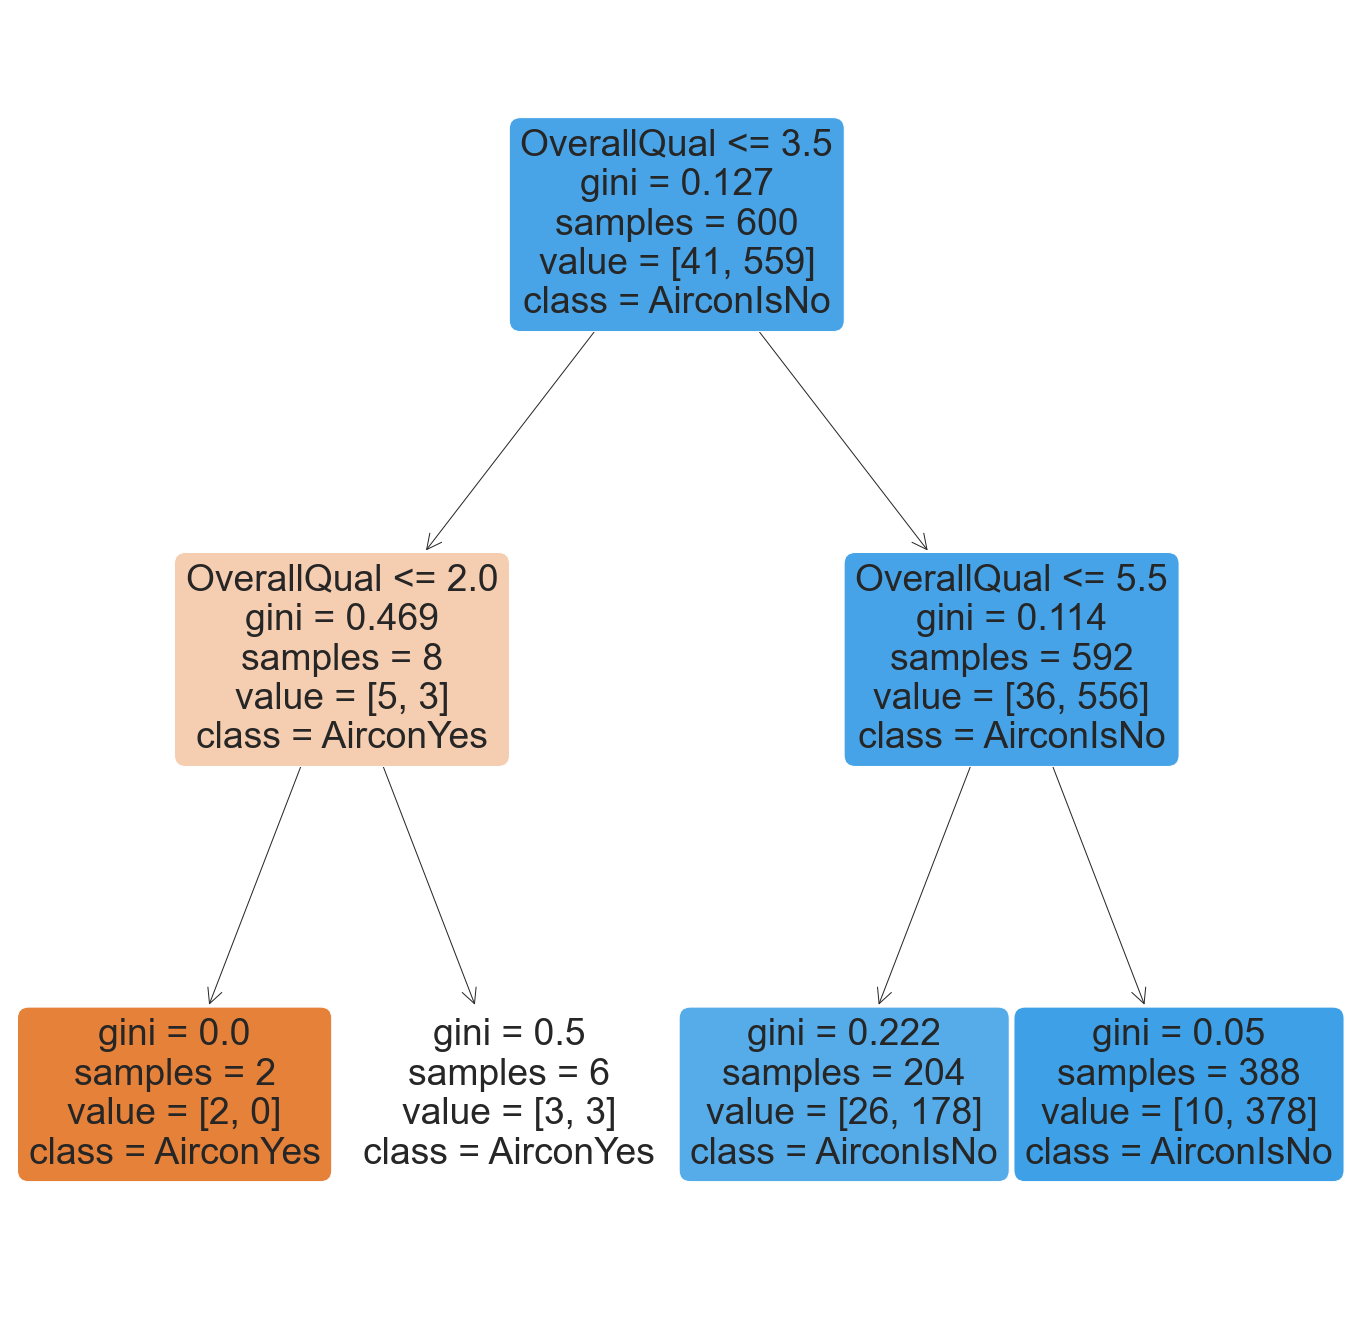

In [31]:

f = plt.figure(figsize=(24,24))

plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["AirconYes","AirconIsNo"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9424657534246575

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9315068493150684



<AxesSubplot:>

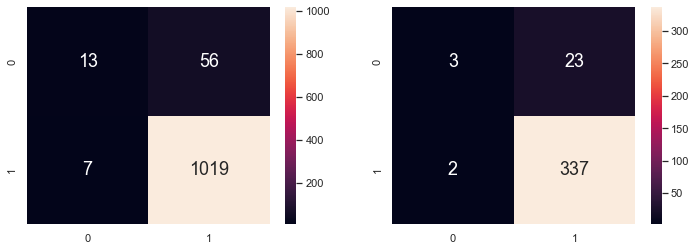

In [32]:
# Recall the Legendary-Total Dataset
legnd = pd.DataFrame(pkmndata['CentralAir'])   # Response
total = pd.DataFrame(pkmndata['OverallQual'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(total, legnd, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [33]:
dectree = DecisionTreeClassifier(max_depth = 4)

In [34]:
legnd = pd.DataFrame(pkmndata["CentralAir"])  # Response
total = pd.DataFrame(pkmndata['YearBuilt']) 
total_train = pd.DataFrame(total[:600])
legnd_train = pd.DataFrame(legnd[:600])

# Test Set : 200 samples
total_test = pd.DataFrame(total[-200:])
legnd_test = pd.DataFrame(legnd[-200:])
dectree1 = DecisionTreeClassifier(max_depth = 2)
dectree1.fit(total_train, legnd_train)


DecisionTreeClassifier(max_depth=2)

[Text(669.6, 1087.2, 'YearBuilt <= 1928.5\ngini = 0.127\nsamples = 600\nvalue = [41, 559]\nclass = AirconIsNo'),
 Text(334.8, 652.32, 'YearBuilt <= 1896.5\ngini = 0.472\nsamples = 76\nvalue = [29, 47]\nclass = AirconIsNo'),
 Text(167.4, 217.44000000000005, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = AirconIsNo'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.481\nsamples = 72\nvalue = [29, 43]\nclass = AirconIsNo'),
 Text(1004.4000000000001, 652.32, 'YearBuilt <= 1955.5\ngini = 0.045\nsamples = 524\nvalue = [12, 512]\nclass = AirconIsNo'),
 Text(837.0, 217.44000000000005, 'gini = 0.188\nsamples = 95\nvalue = [10, 85]\nclass = AirconIsNo'),
 Text(1171.8, 217.44000000000005, 'gini = 0.009\nsamples = 429\nvalue = [2, 427]\nclass = AirconIsNo')]

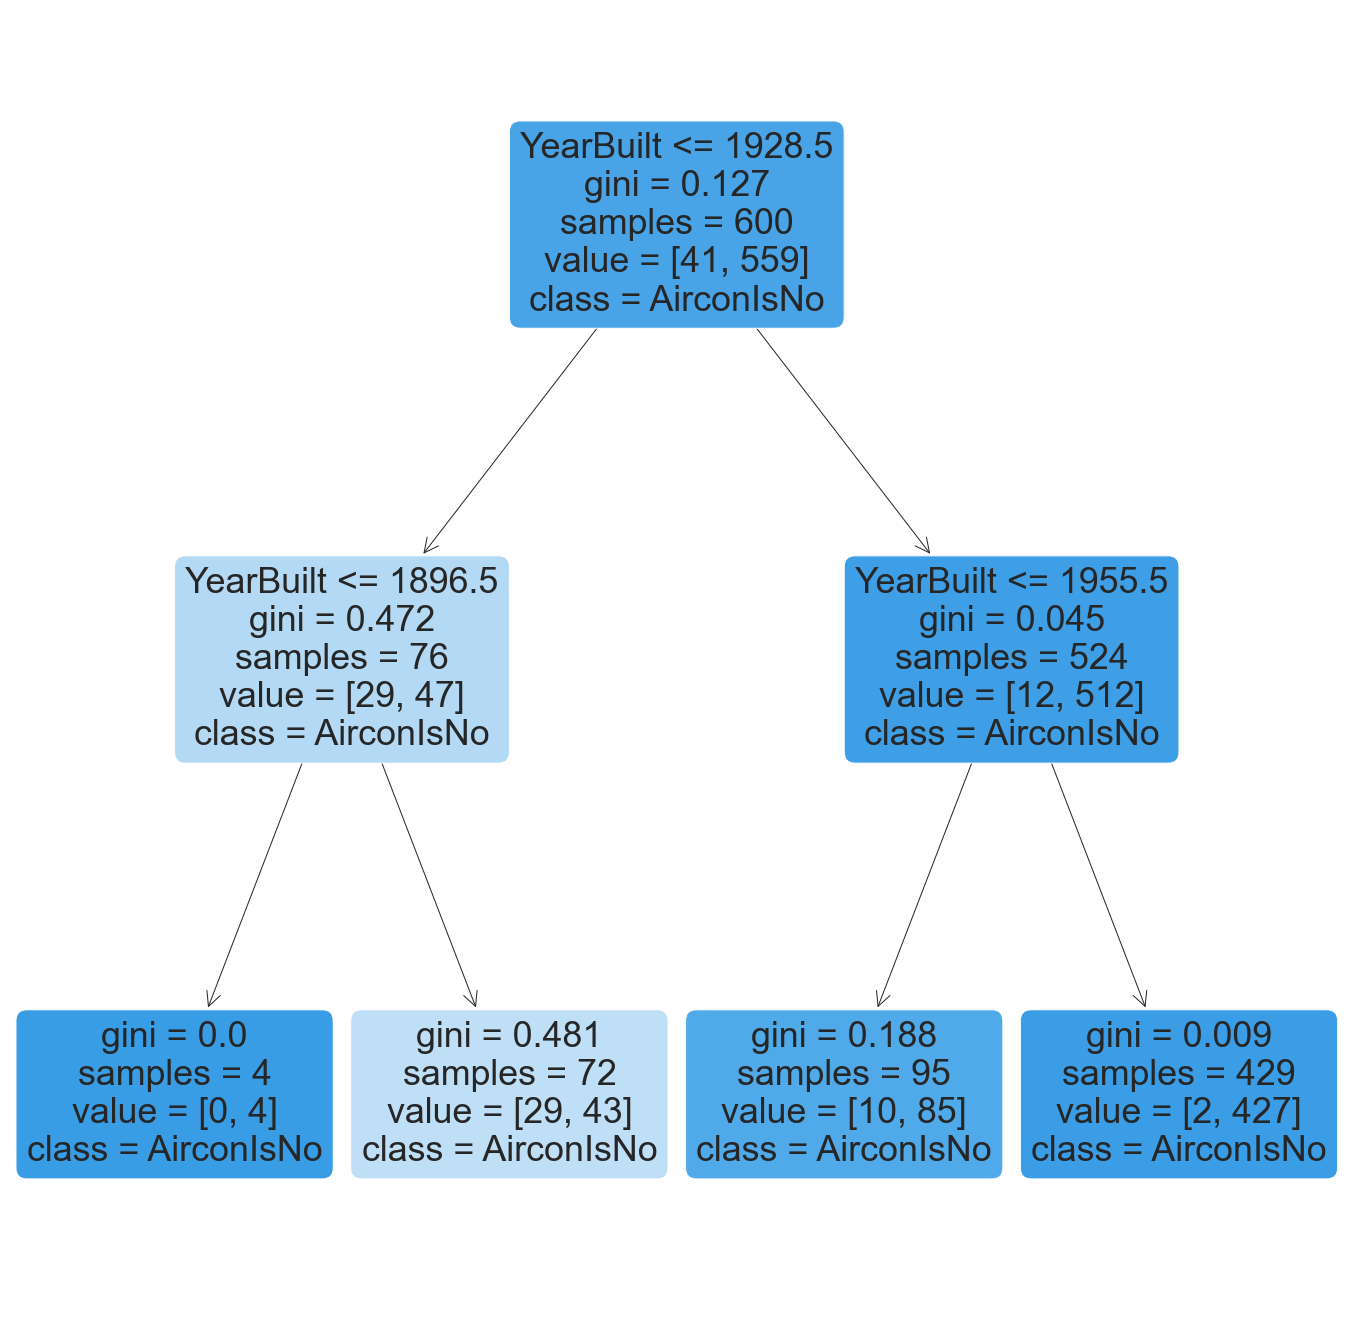

In [35]:
f = plt.figure(figsize=(24,24))

plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["AirconYes","AirconIsNo"])

In [ ]:
# Recall the Legendary-Total Dataset
legnd = pd.DataFrame(pkmndata['CentralAir'])   # Response
total = pd.DataFrame(pkmndata['OverallQual'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(total, legnd, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9351598173515981

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9534246575342465



<AxesSubplot:>